In [163]:
import pandas as pd 
import numpy as np
import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neighbors import KNeighborsRegressor
from warnings import filterwarnings
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [5]:
print("volkan")

volkan


In [164]:
data_order = pd.read_excel('/home/oh856/Downloads/Performance/orders.xlsx')
prod_perf= pd.read_excel('/home/oh856/Downloads/Performance/perf.xlsx')

In [17]:
order = data_order[['KPI_DATE','OMTNUM','TRADESNUM']]

In [18]:
order1 = data_order[['KPI_DATE','OMTNUM','TRADESNUM']]
prod_perf1= pd.read_excel('/home/oh856/Downloads/Performance/perf.xlsx')

In [27]:
start_date = '2020-11-30'
end_date = '2021-05-01'


In [47]:
order = order.drop(['level_0'],axis=1)

In [50]:
order

,index,KPI_DATE,OMTNUM,TRADESNUM
0,1,2020-12-01,2652,750
1,2,2020-12-02,3399,1163
2,3,2020-12-03,2919,1026
3,4,2020-12-04,2555,1171
4,5,2020-12-05,2008,665
...,...,...,...,...
146,147,2021-04-26,1786,2086
147,148,2021-04-27,2167,1392
148,149,2021-04-28,1457,1201
149,150,2021-04-29,2836,2259


In [28]:
order.drop(order[order.KPI_DATE > end_date].index, inplace=True)

In [29]:
order.drop(order[order.KPI_DATE < start_date].index, inplace=True)

In [42]:
order.drop(order[order.KPI_DATE == '2020-11-30'].index, inplace=True)

In [51]:
#order = order.reset_index()
order = order.drop(['index'], axis=1)

In [24]:
prod_perf = prod_perf.reset_index()
prod_perf.drop(['index'], axis=1)

,day,Local O 50p,Local O 99\t5p,Local O 99\t8p,Remote O 50p,Remote O 99\t5p,Remote O 99\t8p,Remote Rprt O 50p,Remote Rprt O 99\t5p,Remote Rprt O 99\t8p
0,2020-12-01,6.0,20.055,59.332,5,10.000,14.226,5,17.840,26.000
1,2020-12-02,6.0,52.600,290.730,5,9.535,11.014,5,14.000,19.426
2,2020-12-03,6.0,21.600,36.000,5,18.900,115.432,5,16.000,22.772
3,2020-12-04,6.0,22.785,73.570,5,11.920,26.408,5,16.000,32.132
4,2020-12-05,6.0,15.075,28.140,5,10.965,59.586,5,13.940,15.176
...,...,...,...,...,...,...,...,...,...,...
146,2021-04-26,16.0,26.000,26.000,11,27.410,40.604,12,32.000,42.112
147,2021-04-27,11.0,22.775,22.910,11,24.310,43.096,13,28.000,42.092
148,2021-04-28,15.0,123.125,191.390,11,27.235,80.426,13,33.545,50.672
149,2021-04-29,11.0,27.190,27.676,11,22.005,28.402,14,28.955,34.782


In [39]:
prod_perf.drop(prod_perf[prod_perf.day > end_date].index, inplace=True)
prod_perf.drop(prod_perf[prod_perf.day < start_date].index, inplace=True)

In [52]:
prod_perf['OMT_NUM'] = order['OMTNUM'].values
prod_perf['TRADESNUM'] = order['TRADESNUM'].values

In [54]:
prod_perf = prod_perf.drop(['index'], axis=1)

In [55]:
prod_perf

,day,Local O 50p,Local O 99\t5p,Local O 99\t8p,Remote O 50p,Remote O 99\t5p,Remote O 99\t8p,Remote Rprt O 50p,Remote Rprt O 99\t5p,Remote Rprt O 99\t8p,OMT_NUM,TRADESNUM
0,2020-12-01,6.0,20.055,59.332,5,10.000,14.226,5,17.840,26.000,2652,750
1,2020-12-02,6.0,52.600,290.730,5,9.535,11.014,5,14.000,19.426,3399,1163
2,2020-12-03,6.0,21.600,36.000,5,18.900,115.432,5,16.000,22.772,2919,1026
3,2020-12-04,6.0,22.785,73.570,5,11.920,26.408,5,16.000,32.132,2555,1171
4,2020-12-05,6.0,15.075,28.140,5,10.965,59.586,5,13.940,15.176,2008,665
...,...,...,...,...,...,...,...,...,...,...,...,...
146,2021-04-26,16.0,26.000,26.000,11,27.410,40.604,12,32.000,42.112,1786,2086
147,2021-04-27,11.0,22.775,22.910,11,24.310,43.096,13,28.000,42.092,2167,1392
148,2021-04-28,15.0,123.125,191.390,11,27.235,80.426,13,33.545,50.672,1457,1201
149,2021-04-29,11.0,27.190,27.676,11,22.005,28.402,14,28.955,34.782,2836,2259


In [56]:
x = prod_perf[['OMT_NUM','TRADESNUM']]
y = prod_perf['Local O 99\t5p']

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30,
                                                          train_size = 0.70, random_state =0)

In [112]:
forest = RandomForestRegressor(n_estimators= 100,
                            criterion= "mse",
                            random_state= 1,
                            n_jobs= -1)

forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 2348.769, MSE test data: 262125.956
R2 train data: 0.778, R2 test data: -0.058


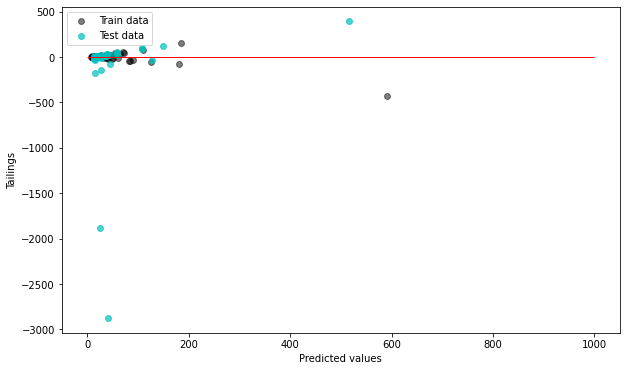

In [113]:
import matplotlib.pyplot as pl

pl.figure(figsize=(10,6))

pl.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 1000, lw = 1, color = 'red')
pl.show()

In [114]:
y_pred2 = forest.predict(x)

In [120]:
pd.DataFrame({"Prediction": y_pred2[0:10],
              "Real_value": y[0:10]})

,Prediction,Real_value
0,21.19445,20.055
1,39.17580,52.600
2,44.86275,21.600
3,23.08460,22.785
4,16.44850,15.075
5,19.91290,23.410
6,25.78935,16.000
7,26.81715,169.765
8,35.36800,15.970
9,20.02680,16.810


In [121]:
forest.score(x_train,y_train)


0.7776380336177822

In [156]:
rf_params = {"n_estimators": np.arange(1,40,1)}
rf =RandomForestRegressor()

In [157]:
rf_cv_model = GridSearchCV(forest,rf_params, cv =10)


In [158]:
rf_cv_model.fit(x_train,y_train)


GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1, random_state=1),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [159]:
rf_cv_model.best_params_


{'n_estimators': 4}

In [160]:
rf_tuned = RandomForestRegressor(n_estimators=4)


In [161]:
rf_tuned.fit(x_train, y_train)


RandomForestRegressor(n_estimators=4)

In [162]:
rf_tuned.score(x_train,y_train)


0.4731067788076204

In [131]:
y_pred3 = rf_tuned.predict(x)

In [133]:
pd.DataFrame({"Prediction": y_pred3[15:20],
              "Real_value": y[15:20]})

,Prediction,Real_value
15,12.1700,4.000
16,18.3525,10.000
17,9.9200,9.920
18,14.9825,14.925
19,12.9400,7.000


In [140]:
new_Data = [[10870],[3304]]
new_Data = pd.DataFrame(new_Data).T
rf_tuned.predict(new_Data)

array([47.68125])

In [179]:
order

,KPI_DATE,OMTNUM,TRADESNUM
0,2020-12-01,2652,750
1,2020-12-02,3399,1163
2,2020-12-03,2919,1026
3,2020-12-04,2555,1171
4,2020-12-05,2008,665
...,...,...,...
146,2021-04-26,1786,2086
147,2021-04-27,2167,1392
148,2021-04-28,1457,1201
149,2021-04-29,2836,2259


In [189]:
order1.head(-8)

,KPI_DATE,OMTNUM,TRADESNUM
0,2020-01-01,1604,423
1,2020-01-02,2051,396
2,2020-01-03,2425,457
3,2020-01-04,2112,218
4,2020-01-05,1509,157
...,...,...,...
506,2021-05-21,16613,1281
507,2021-05-22,7194,1051
508,2021-05-23,40779,2404
509,2021-05-24,30685,1606


In [182]:
prod_perf1.head(-1)

,day,Local O 50p,Local O 99\t5p,Local O 99\t8p,Remote O 50p,Remote O 99\t5p,Remote O 99\t8p,Remote Rprt O 50p,Remote Rprt O 99\t5p,Remote Rprt O 99\t8p
0,2020-12-01,6.0,20.055,59.332,5,10.000,14.226,5,17.840,26.000
1,2020-12-02,6.0,52.600,290.730,5,9.535,11.014,5,14.000,19.426
2,2020-12-03,6.0,21.600,36.000,5,18.900,115.432,5,16.000,22.772
3,2020-12-04,6.0,22.785,73.570,5,11.920,26.408,5,16.000,32.132
4,2020-12-05,6.0,15.075,28.140,5,10.965,59.586,5,13.940,15.176
...,...,...,...,...,...,...,...,...,...,...
145,2021-04-25,13.0,24.820,24.928,10,22.545,33.436,12,28.000,34.978
146,2021-04-26,16.0,26.000,26.000,11,27.410,40.604,12,32.000,42.112
147,2021-04-27,11.0,22.775,22.910,11,24.310,43.096,13,28.000,42.092
148,2021-04-28,15.0,123.125,191.390,11,27.235,80.426,13,33.545,50.672


In [175]:
rf_tuned = RandomForestRegressor(n_estimators= 27)
                                

rf_tuned.fit(x_train, y_train)
forest_train_pred = rf_tuned.predict(x_train)
forest_test_pred = rf_tuned.predict(x_test)
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 2630.357, MSE test data: 263240.950
R2 train data: 0.751, R2 test data: -0.062


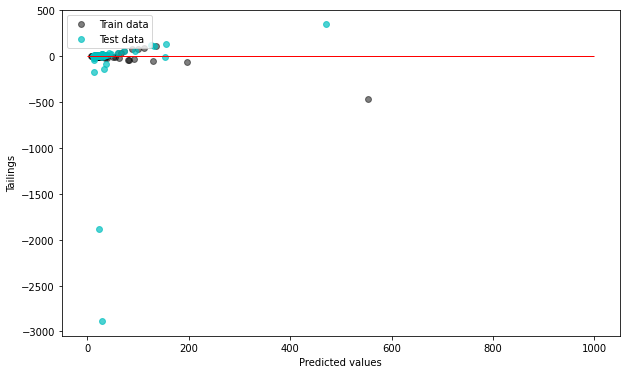

In [176]:
pl.figure(figsize=(10,6))

pl.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 1000, lw = 1, color = 'red')
pl.show()